## Introduction

This notebook explores the impact Covid-19 has had on food insecurity in the United States. 

## Getting Our Environment Ready

In [ ]:
library(repr)
options(repr.plot.width=12, repr.plot.height = 12)

In [ ]:
#The packages we'll use
library(tidyverse)
library(ggthemes)
library(scales)
library(reshape2)

#Our Data 
Survey_Data <- read_csv("../input/pulse-survey-food-insecurity-data/Final_Pulse_Data.csv")

#Convert our numeric columns to numeric type and then sum them up
cols.num <- colnames(Survey_Data[,1:5])
Survey_Data[cols.num] <- sapply(Survey_Data[cols.num],as.numeric)
Survey_Data$Total<-rowSums(Survey_Data[,cols.num])
#Change the levels for Race to make it plot better
Survey_Data$Race <- as.factor(Survey_Data$Race)
levels(Survey_Data$Race) <- c("Asian", "Black", "Hispanic or Latino", "Two or More Races", "White")

#Clean up the week field
Survey_Data$Week <- as.numeric(gsub('[a-zA-Z]', '', Survey_Data$Week))
Survey_Data$Week <- as.factor(Survey_Data$Week)

#Create a clean date field that's easier to plot
Survey_Data$Date <- word(Survey_Data$week_name,-1)
Survey_Data$Date2 <- word(Survey_Data$week_name,-2)
Survey_Data$Date_Final <- paste(Survey_Data$Date2, Survey_Data$Date, Survey_Data$Year, sep = "/")
Survey_Data$Date_Final <-as.Date(Survey_Data$Date_Final, "%B/%d/%Y")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Rows: 305788 Columns: 40

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (32): Age, Sex_At_Birth, Race, Education, Marital_Status, Children_Prese...
dbl  (6): Enough of the kinds of food wanted, Enough Food, but not always th...
lgl  (2): Sexual_Orientation, LGBT


ℹ Use `spec()` to retriev

## Examining Food Insecurity

For our first plots, let's see how different demographics have experienced food insecurity throughout the pandemic. 

### Food Insecurity by Race

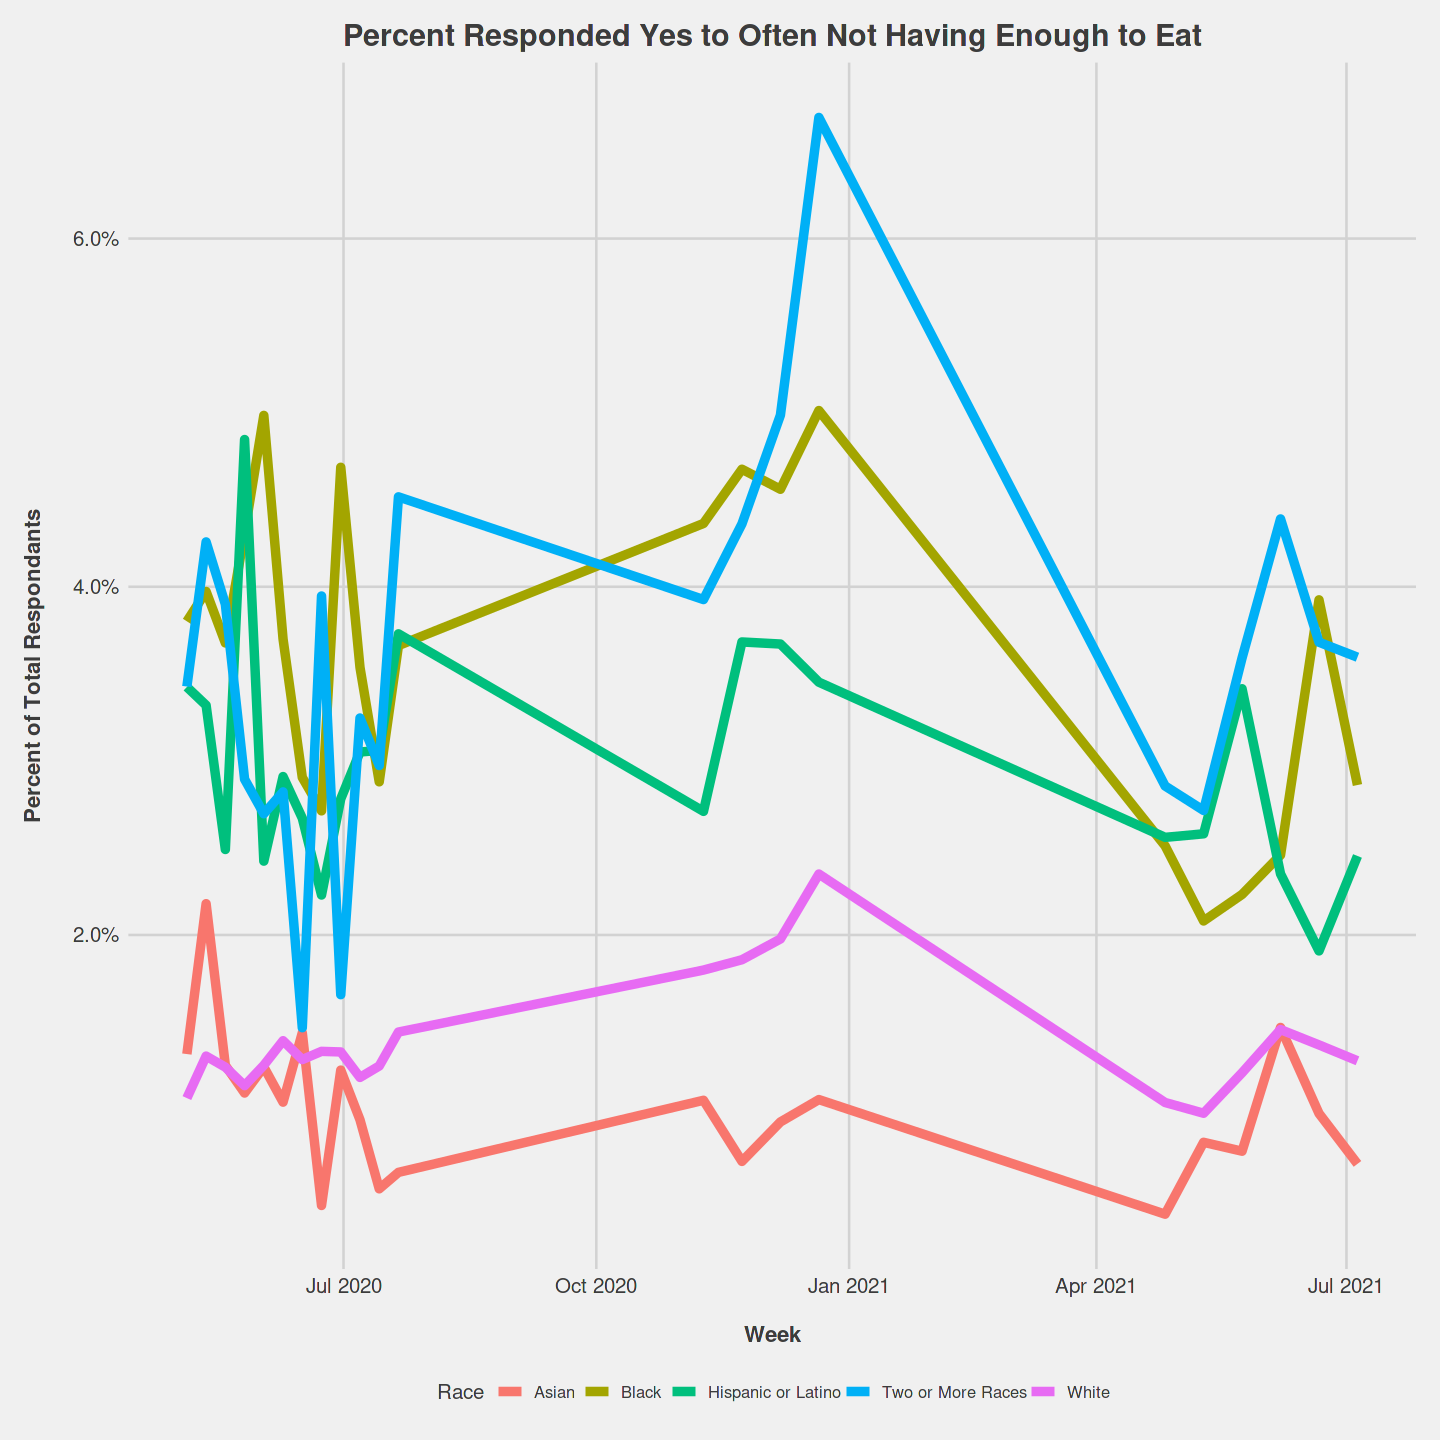

In [ ]:
Survey_Data %>%
  filter(!is.na(Race)) %>% 
  filter(Location=="US") %>% 
  mutate(As_Percent= `Often not enough to eat` / Total) %>% 
  ggplot() + aes(x= Date_Final, y= As_Percent, group= Race, color= Race) + geom_line(size=2)+ theme_fivethirtyeight() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5),
        axis.text = element_text(size=12)) +
  ylab("Percent of Total Respondants\n") +xlab("\nWeek") + ggtitle("Percent Responded Yes to Often Not Having Enough to Eat")  + 
scale_y_continuous(labels = scales::percent)

### Food Insecurity by Education

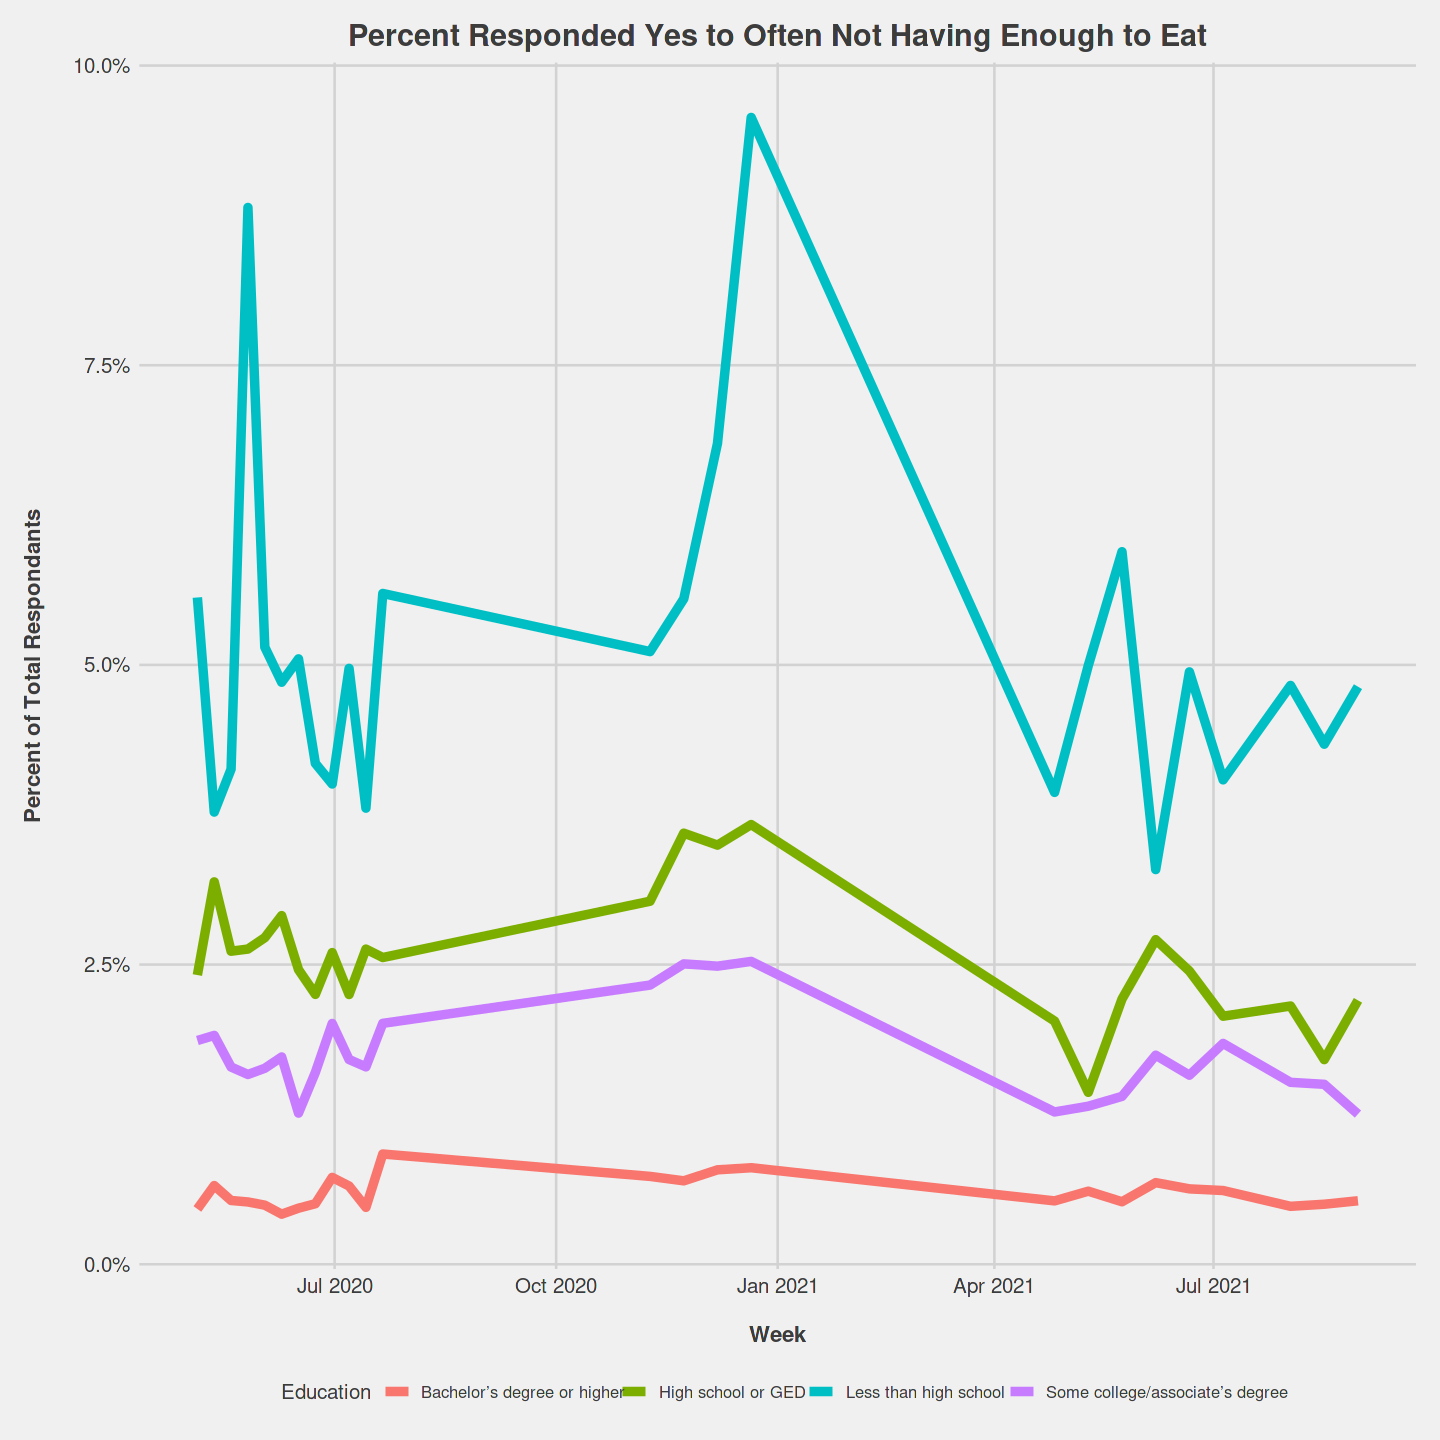

In [ ]:
Survey_Data %>%
  filter(!is.na(Education)) %>% 
  filter(Location=="US") %>% 
  mutate(As_Percent= `Often not enough to eat` / Total) %>% 
  ggplot() + aes(x= Date_Final, y= As_Percent, group= Education, color= Education) + geom_line(size=2)+ theme_fivethirtyeight() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5),
        axis.text = element_text(size=12)) +
  ylab("Percent of Total Respondants\n") +xlab("\nWeek") + ggtitle("Percent Responded Yes to Often Not Having Enough to Eat")  + 
scale_y_continuous(labels = scales::percent)

### Food Insecurity by Sex

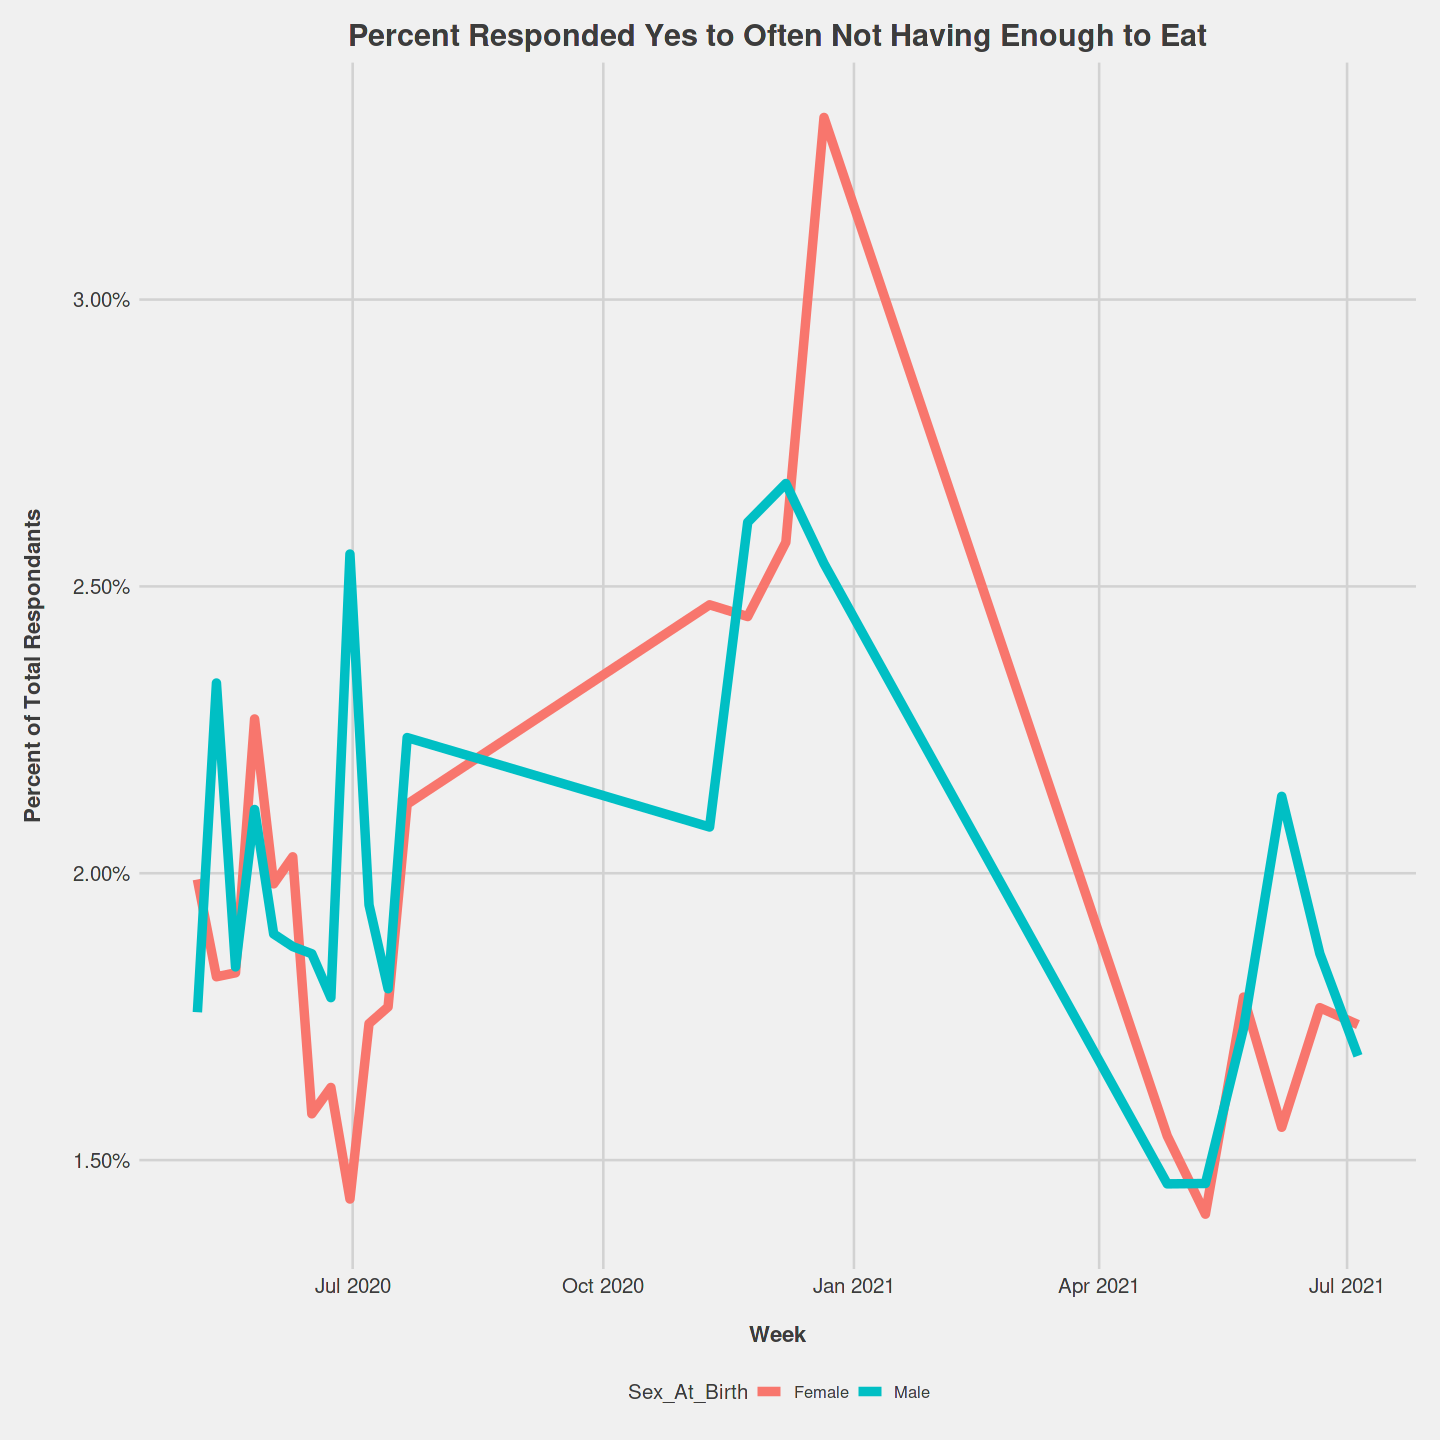

In [ ]:
Survey_Data %>%
  filter(!is.na(Sex_At_Birth)) %>% 
  filter(Location=="US") %>% 
  mutate(As_Percent= `Often not enough to eat` / Total) %>% 
  ggplot() + aes(x= Date_Final, y= As_Percent, group= Sex_At_Birth, color= Sex_At_Birth) + geom_line(size=2)+ theme_fivethirtyeight() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5),
        axis.text = element_text(size=12)) +
  ylab("Percent of Total Respondants\n") +xlab("\nWeek") + ggtitle("Percent Responded Yes to Often Not Having Enough to Eat") + 
scale_y_continuous(labels = scales::percent)

### Food Insecurity by Income

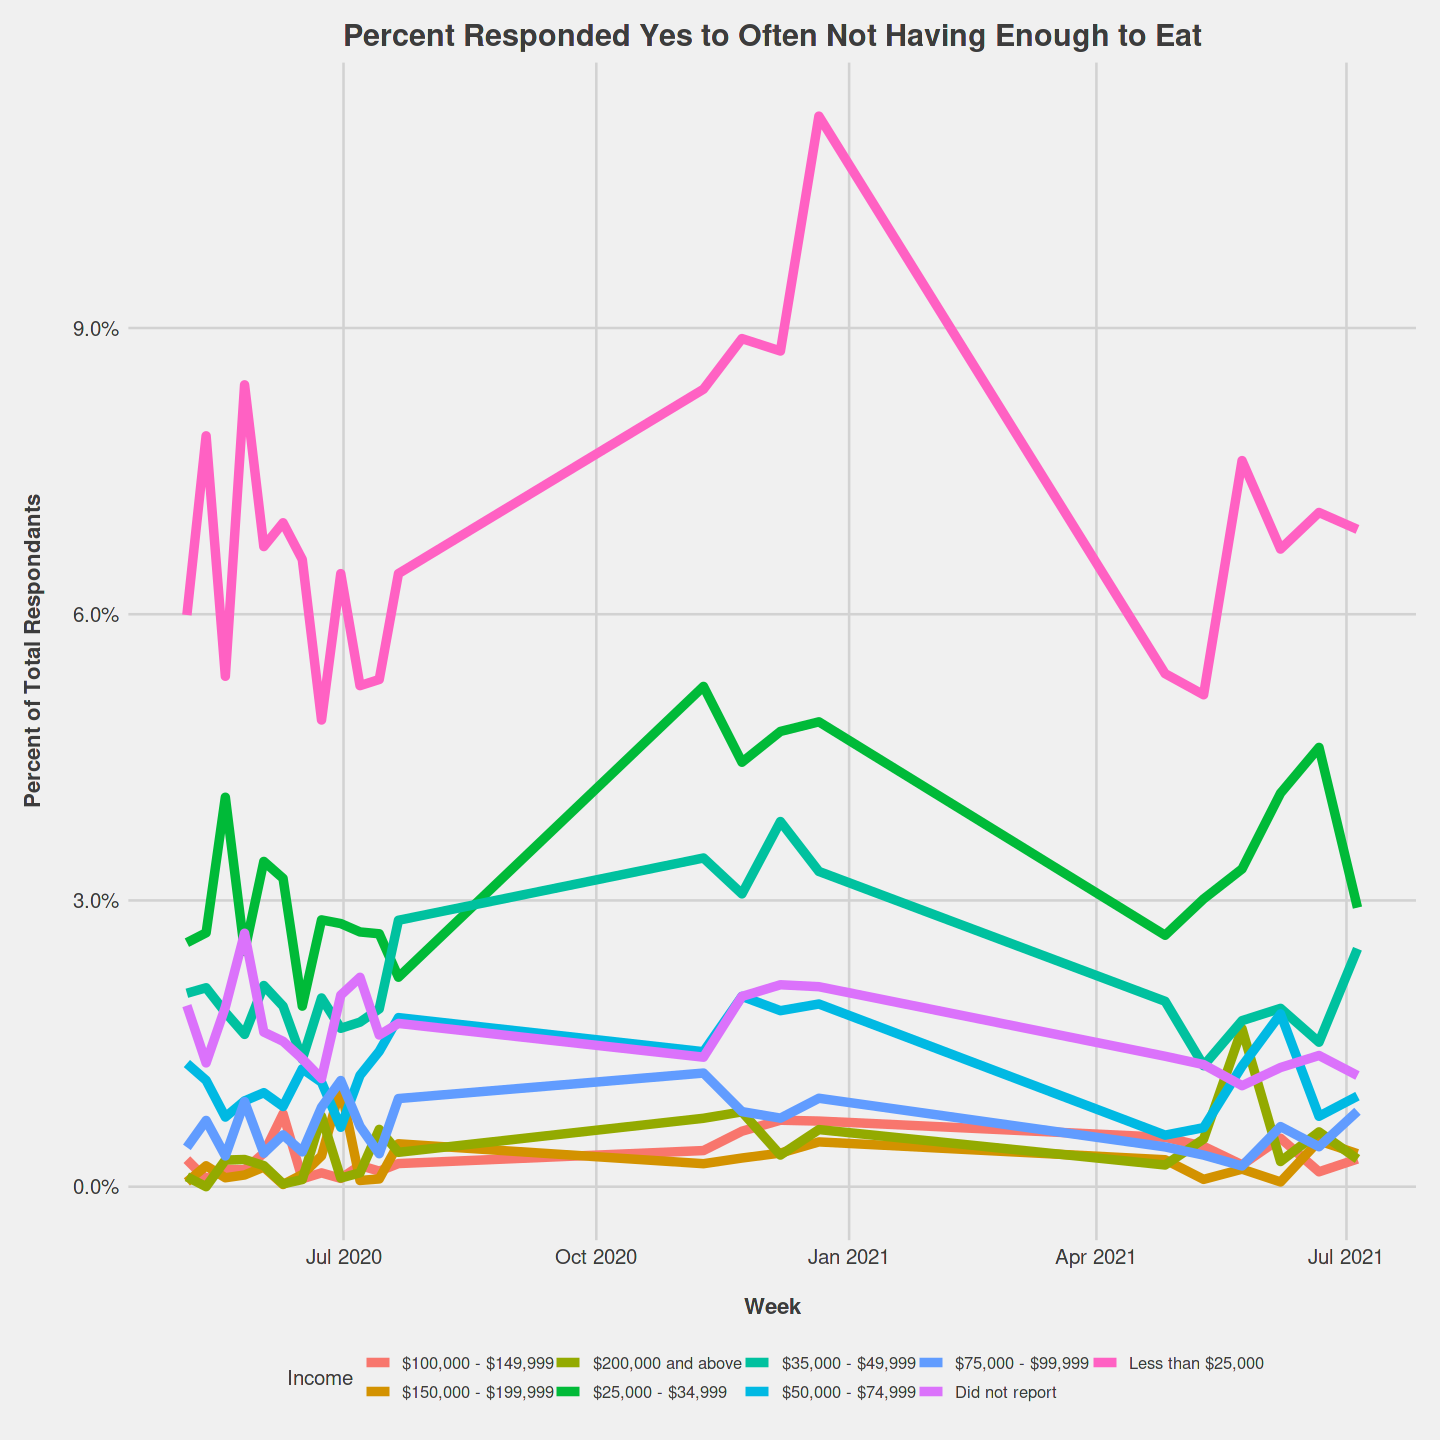

In [ ]:
Survey_Data %>%
  filter(!is.na(Income)) %>% 
  filter(Location=="US") %>% 
  mutate(As_Percent= `Often not enough to eat` / Total) %>% 
  ggplot() + aes(x= Date_Final, y= As_Percent, group= Income, color= Income) + geom_line(size=2)+ theme_fivethirtyeight() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5),
        axis.text = element_text(size=12)) +
  ylab("Percent of Total Respondants\n") +xlab("\nWeek") + ggtitle("Percent Responded Yes to Often Not Having Enough to Eat") + 
scale_y_continuous(labels = scales::percent)

Okay, this is getting boring. Let's see what else we can visualize. 

## Food Security In General

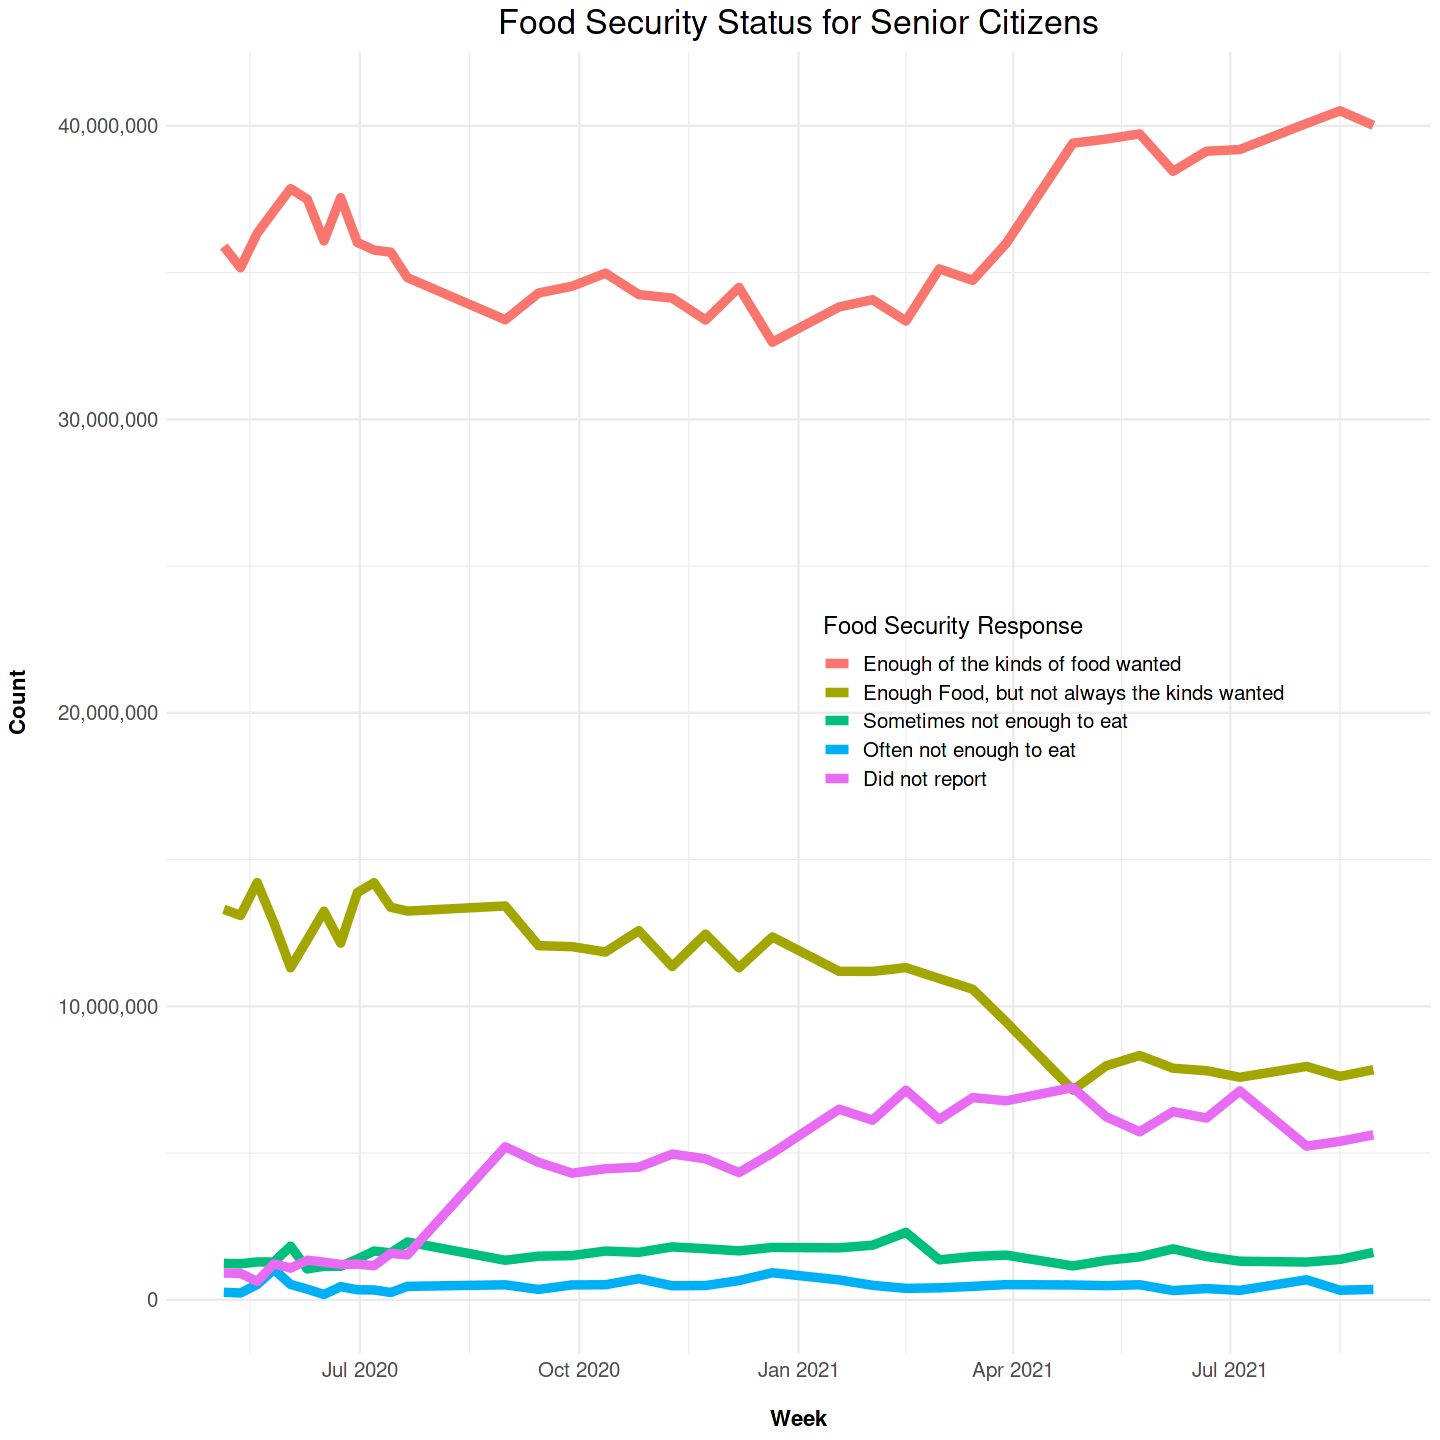

In [ ]:
#Make our data able to be plotted
#First we select for seniors and total US data 
new_df <- Survey_Data %>% 
    filter(Age== "65 and above") %>% 
    filter(Location=="US") 
new_df <- new_df[,c(1:5,44)]
df <- melt(new_df, id.vars='Date_Final')

#Actually plot it 
options(scipen=999)
df %>% 
ggplot() + aes(x= Date_Final, y= value, group=variable, color=variable) + geom_line(size=2)+ theme_minimal() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5, size=20),
        axis.text = element_text(size=12), legend.text=element_text(size=12),
       legend.position = c(0.7, 0.5),legend.title=element_text(size=14)) +
  ylab("Count\n") +xlab("\nWeek") + ggtitle("Food Security Status for Senior Citizens") +
  scale_y_continuous(label=comma) + scale_colour_discrete(name = "Food Security Response")

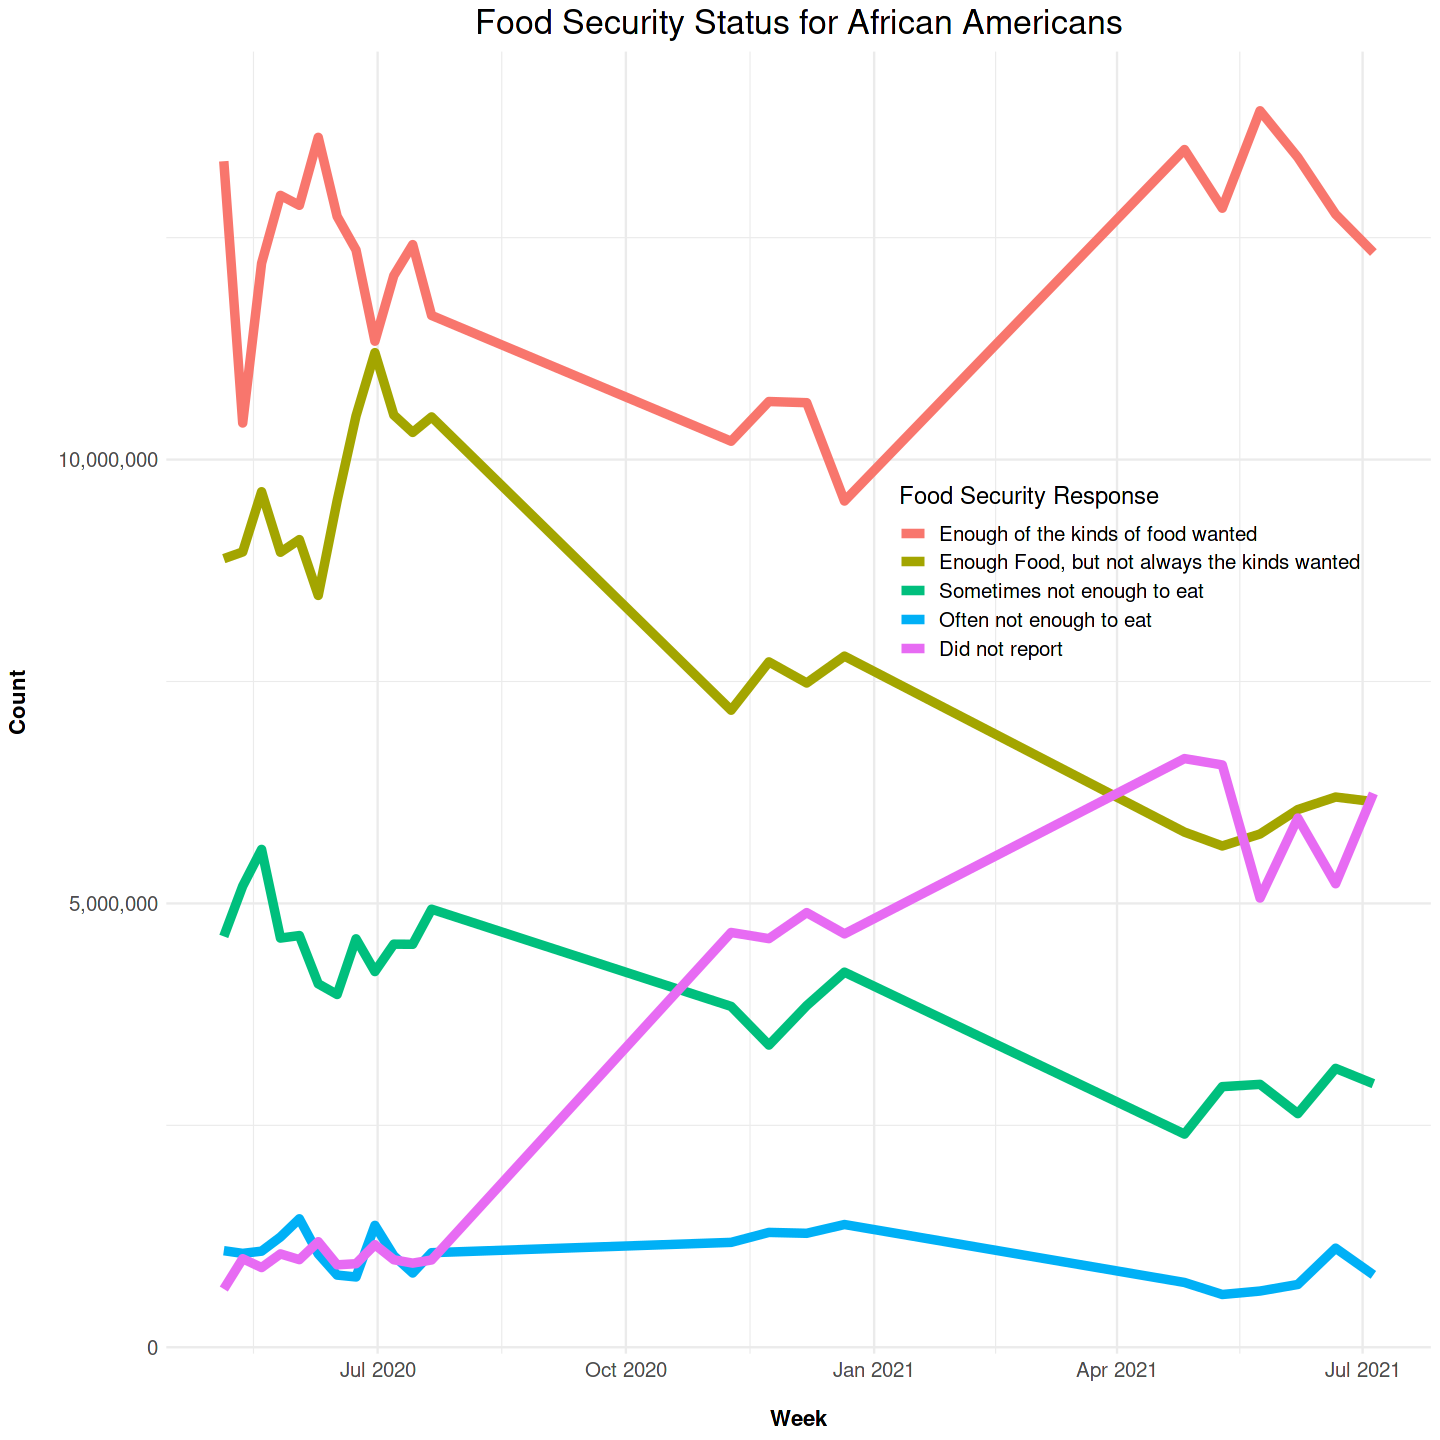

In [ ]:
#Make our data able to be plotted
#First we select for seniors and total US data 
new_df <- Survey_Data %>% 
    filter(Race== "Black") %>% 
    filter(Location=="US") 
new_df <- new_df[,c(1:5,44)]
df <- melt(new_df, id.vars='Date_Final')

#Actually plot it 
options(scipen=999)
df %>% 
ggplot() + aes(x= Date_Final, y= value, group=variable, color=variable) + geom_line(size=2)+ theme_minimal() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5, size=20),
        axis.text = element_text(size=12), legend.text=element_text(size=12),
       legend.position = c(0.76, 0.6),legend.title=element_text(size=14)) +
  ylab("Count\n") +xlab("\nWeek") + ggtitle("Food Security Status for African Americans") +
  scale_y_continuous(label=comma) + scale_colour_discrete(name = "Food Security Response")

# Other Impacts We Can See

Because this survey gauges multiple charecteristics, we can also gauge other effects of covid, for instance, some economic indicators.

### Covid-19's Impact on Retirement

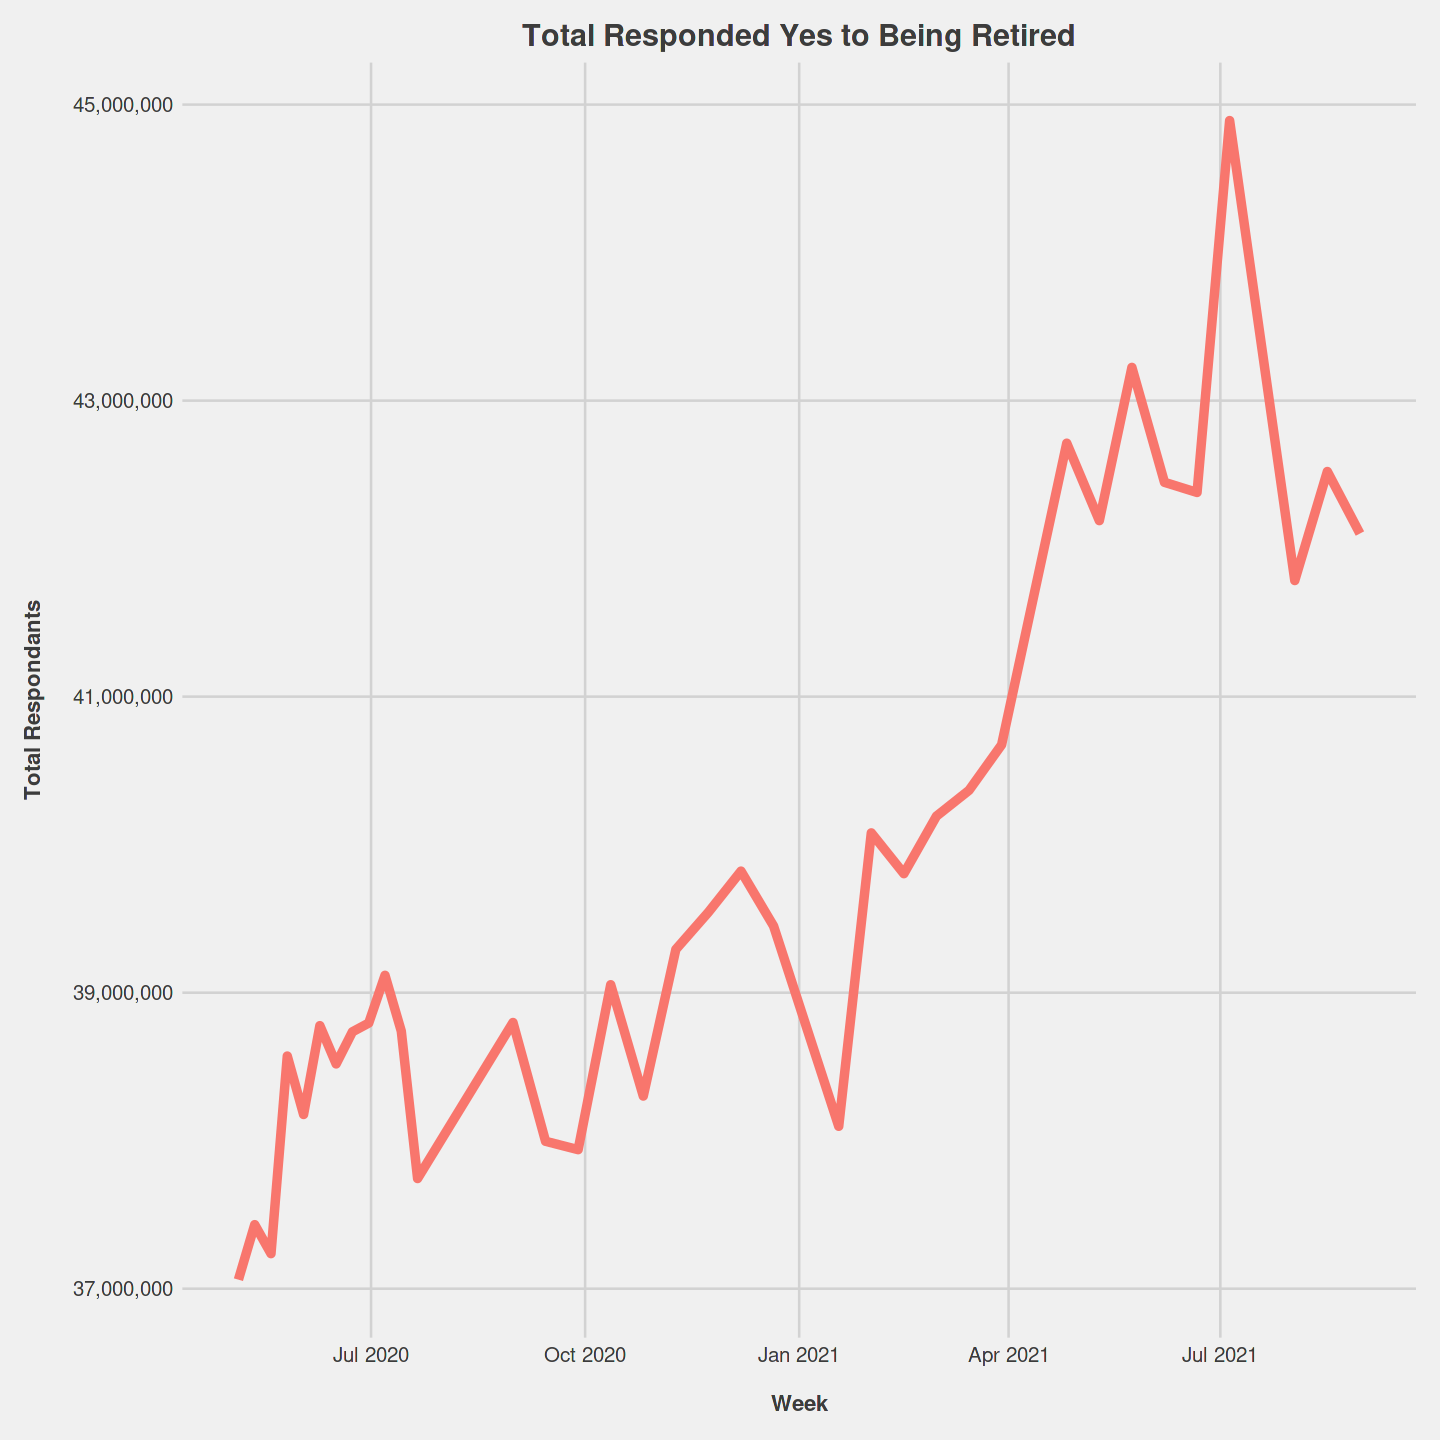

In [ ]:
Survey_Data %>%
  filter(!is.na(Reason_Not_Working))%>% 
  filter(Reason_Not_Working== "Retired" | Reason_Not_Working == "I am retired")%>% 
  mutate(Reason_Not_Working = c("Retired")) %>% 
  filter(Location== "US") %>% 
  ggplot() + aes(x= Date_Final, y= Total, group= Reason_Not_Working, color=Reason_Not_Working) + geom_line(size=2)+ theme_fivethirtyeight() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5),
        axis.text = element_text(size=12), legend.position= "none") +ylab("Total Respondants\n") +xlab("\nWeek") + ggtitle("Total Responded Yes to Being Retired")+
scale_y_continuous(label=comma)

### Covid-19's Impact on Income

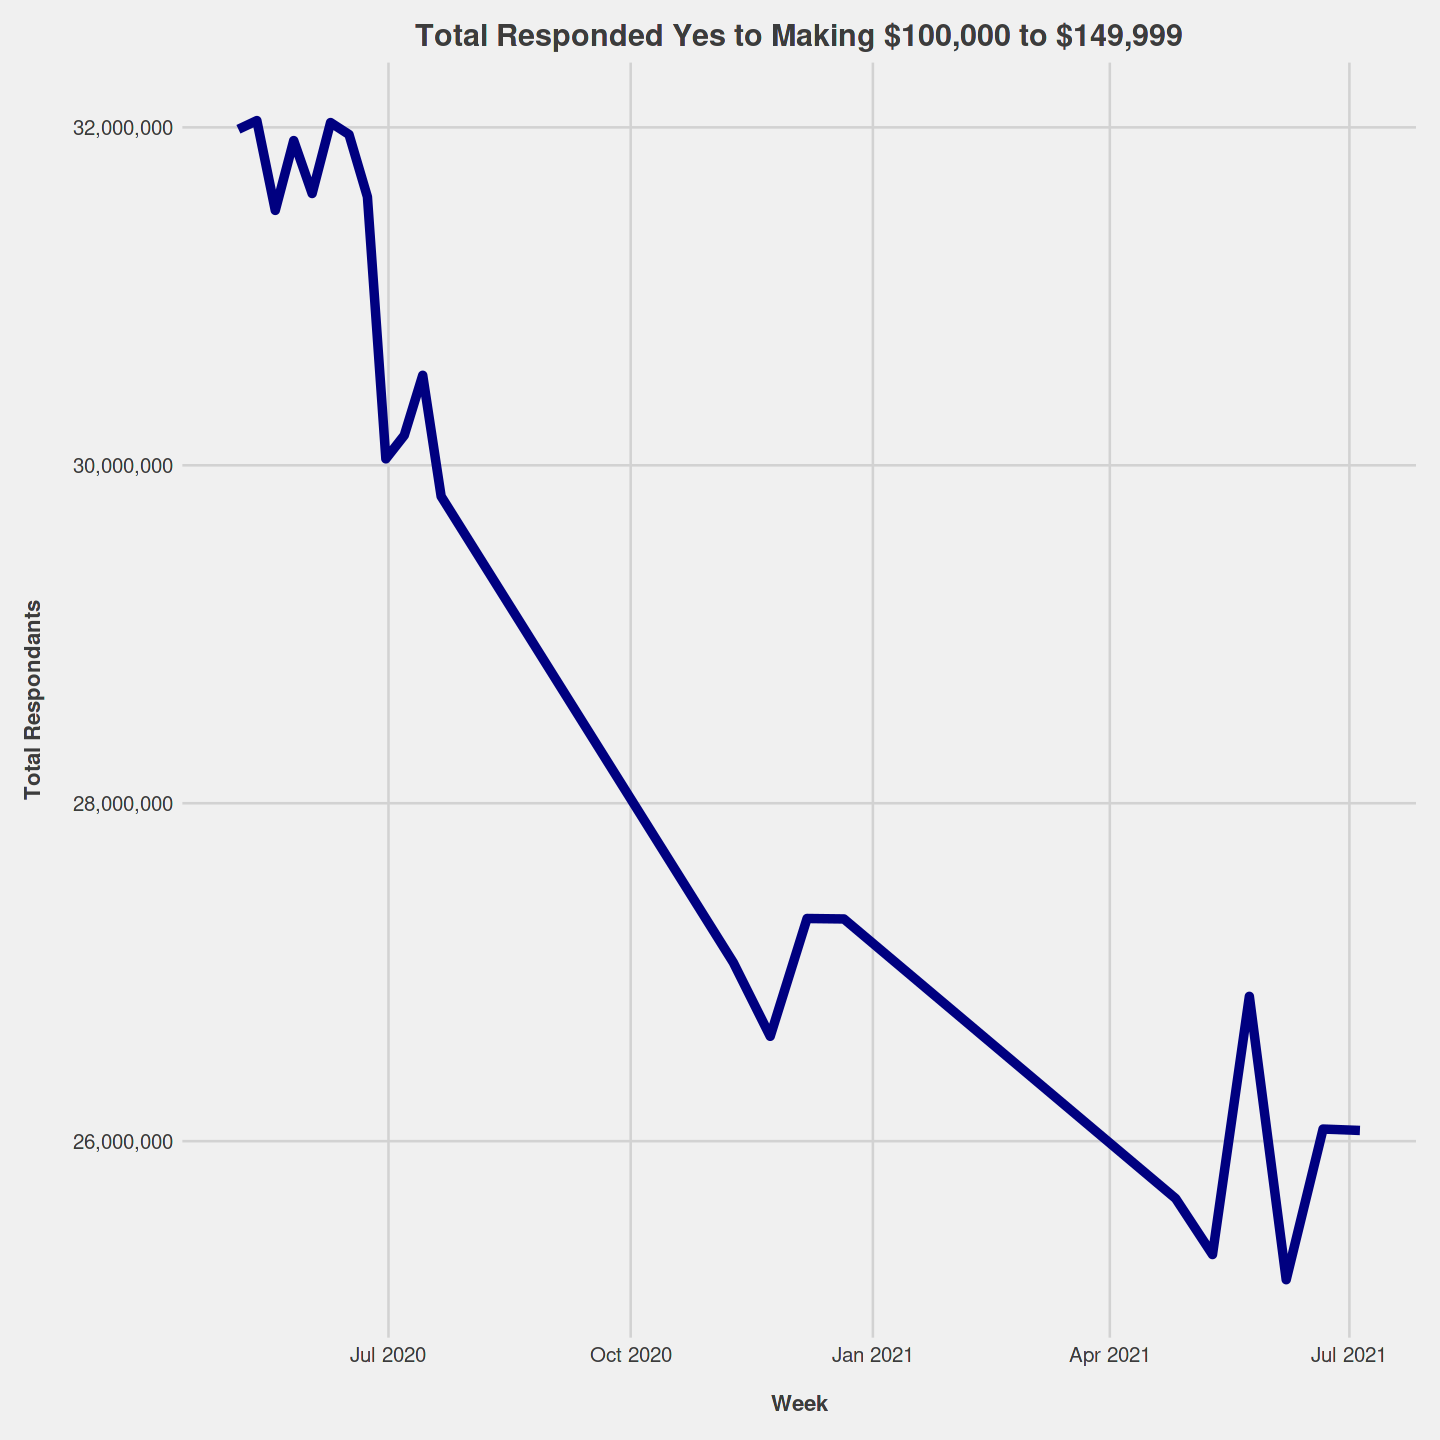

In [ ]:
Survey_Data %>%
  filter(!is.na(Income))%>% 
  filter(Income== "$100,000 - $149,999")%>%
  filter(Location== "US") %>% 
  ggplot() + aes(x= Date_Final, y= Total) + geom_line(size=2, color="navyblue")+ theme_fivethirtyeight() + 
  theme(axis.title = element_text(size=13, face="bold"), plot.title = element_text(hjust = .5),
        axis.text = element_text(size=12), legend.position= "none") +ylab("Total Respondants\n") +xlab("\nWeek") + ggtitle("Total Responded Yes to Making $100,000 to $149,999")+
scale_y_continuous(label=comma)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=008b30f3-1127-48f8-a4b4-f5cb6476cfc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>